In [1]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy import io

/usr/local/python-2.7.6/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Last 5 full loss iterations
[ 1822.02088418  1824.26940162  1825.25763936  1821.47057149  1827.26159851]


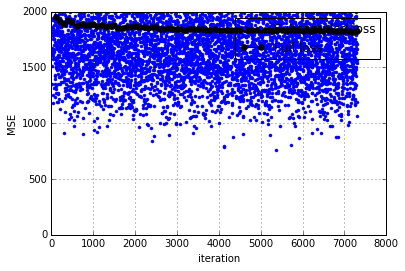

In [2]:
expt=io.loadmat('output.mat')
loss=expt['loss']
loss = loss[loss>0]
lossall = loss[::100]
tall = np.arange(len(lossall))*100

print 'Last 5 full loss iterations'
print lossall[-5:]

plt.plot(loss,'.');
plt.plot(tall,lossall,'ko-');
plt.legend(('Subsampled loss','Full loss'));
plt.ylim(0,2000);
plt.xlabel('iteration');
plt.ylabel('MSE');
plt.grid();

Last 5 full loss iterations
[ 1253.97587101  1254.22933693  1254.17631168  1254.18514071  1253.92970699]


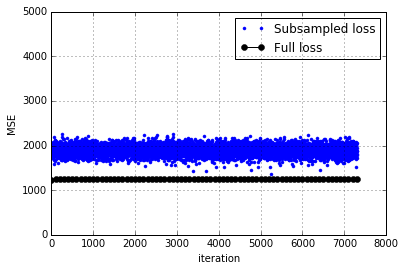

In [3]:
loss_gt=expt['loss_gt']
loss_gt = loss_gt[loss_gt>0]
lossall = loss_gt[::100]
tall = np.arange(len(lossall))*100

print 'Last 5 full loss iterations'
print lossall[-5:]

plt.plot(loss_gt,'.');
plt.plot(tall,lossall,'ko-');
plt.legend(('Subsampled loss','Full loss'));
plt.ylim(0,5000);
plt.xlabel('iteration');
plt.ylabel('MSE');
plt.grid();

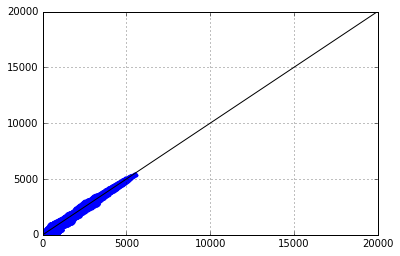

In [4]:
plt.plot(expt['Y'].ravel(),expt['Xhat'].ravel(),'.');
plt.plot([0, 20000],[0, 20000],'k');
plt.grid();

(1, 1048576)
47.0688537124
Color limits: (0, 7.0978252047423993)


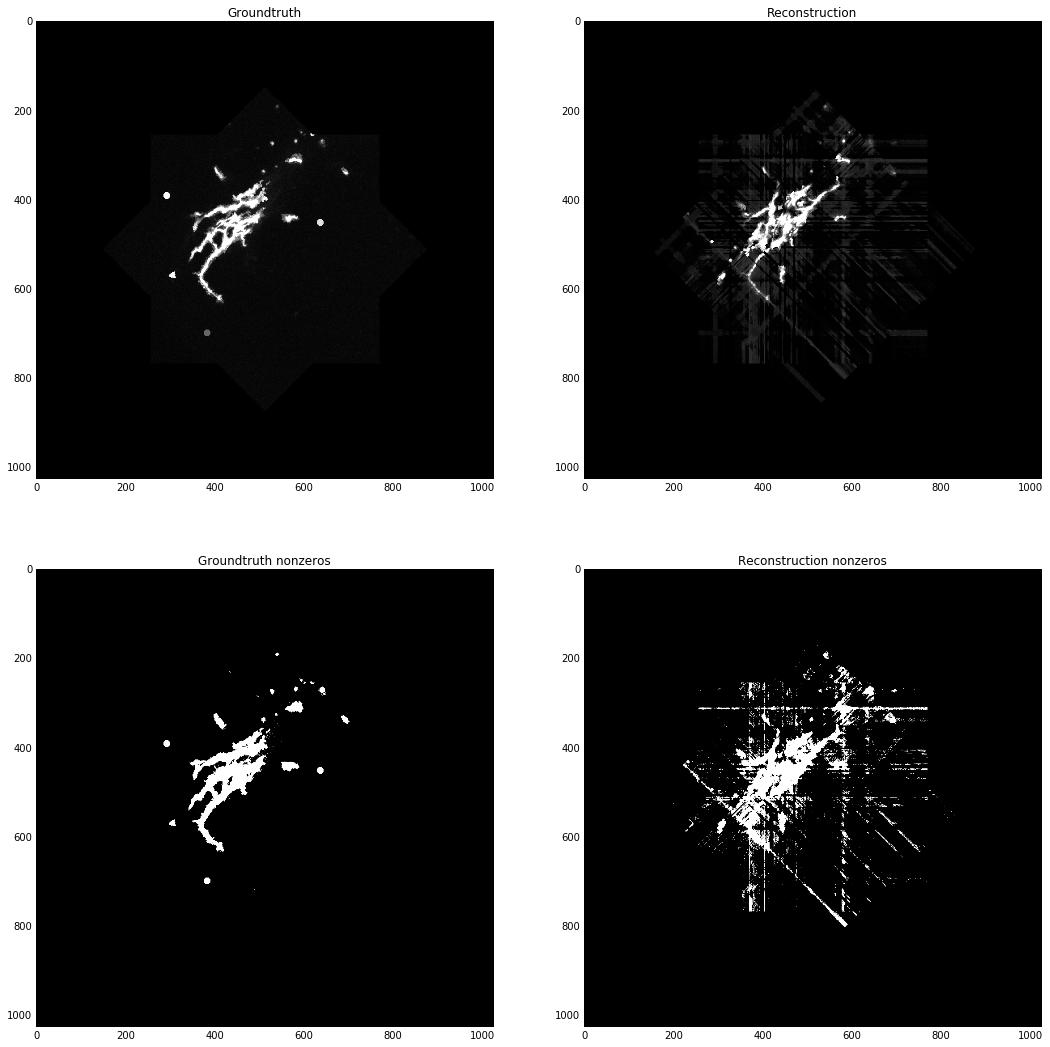

In [4]:
IM = expt['IM'] #REFERENCE IMAGE

recon_gt = expt['recon_gt'];
print recon_gt.shape
recon_gt = np.reshape(recon_gt, IM.shape)

recon = expt['recon'];
print np.max(recon)
recon = np.reshape(recon, IM.shape)

Cmin = 0
Cmax = np.max(recon_gt)*.2
print 'Color limits:', (Cmin, Cmax)

f,ax = plt.subplots(2,2,figsize=(18.,18.));
# ax[0].imshow(recon,cmap=plt.cm.get_cmap('gray'))  #,  vmin=Cmin, vmax=Cmax)
ax[0,0].imshow(recon_gt, vmin=Cmin, vmax=Cmax, cmap=plt.cm.get_cmap('gray'));
ax[0,0].set_title('Groundtruth');
ax[0,1].imshow(recon, vmin=Cmin, vmax=Cmax, cmap=plt.cm.get_cmap('gray'));
ax[0,1].set_title('Reconstruction');
ax[1,0].imshow(recon_gt>1, cmap=plt.cm.get_cmap('gray'));
ax[1,0].set_title('Groundtruth nonzeros');
ax[1,1].imshow(recon>1, cmap=plt.cm.get_cmap('gray'));
ax[1,1].set_title('Reconstruction nonzeros');